<a href="https://colab.research.google.com/github/hahmed988/Machine-Learning/blob/master/Price_Forecast_CaplinPoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:

import pandas as pd
import yfinance as yf

# Fetch historical stock price data
data = yf.download('CAPLIPOINT.NS', start='2018-01-01', end='2024-11-30')

# Aggregate daily stock prices to a monthly level
monthly_data = data['Close'].resample('M').mean()

# Check for anomalies, missing values, and consistency
print(monthly_data.isnull().sum())  # Check for missing values
print(monthly_data.describe())  # Check for anomalies

[*********************100%***********************]  1 of 1 completed

Ticker
CAPLIPOINT.NS    0
dtype: int64
Ticker  CAPLIPOINT.NS
count       83.000000
mean       728.381268
std        404.432435
min        264.738093
25%        421.091129
50%        641.263639
75%        817.661249
max       2026.210539



<ipython-input-9-bb7fa9b9a28d>:8: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_data = data['Close'].resample('M').mean()


In [4]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 19.1 MB/s eta 0:00:00


In [10]:

from pmdarima import auto_arima

# Fit the Auto-ARIMA model
model = auto_arima(monthly_data, start_p=1, start_d=1, start_q=1,
                   max_p=5, max_d=5, max_q=5, start_P=0,
                   seasonal=True, error_action='warn',
                   suppress_warnings=True, stepwise=True)

# Print the best-fit model parameters
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   83
Model:               SARIMAX(1, 2, 1)   Log Likelihood                -453.957
Date:                Sun, 15 Dec 2024   AIC                            913.915
Time:                        09:46:07   BIC                            921.098
Sample:                    01-31-2018   HQIC                           916.797
                         - 11-30-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.2234      0.127      1.762      0.078      -0.025       0.472
ma.L1         -0.9176      0.056    -16.399      0.000      -1.027      -0.808
sigma2      4245.3171    559.461      7.588      0.0

In [11]:

# Forecast the stock prices for the next 12 months
forecast = model.predict(n_periods=12)

# Print the forecasted values
print(forecast)

2024-12-31    2100.778835
2025-01-31    2166.674341
2025-02-28    2230.632232
2025-03-31    2294.157235
2025-04-30    2357.585526
2025-05-31    2420.992209
2025-06-30    2484.394065
2025-07-31    2547.794842
2025-08-31    2611.195379
2025-09-30    2674.595862
2025-10-31    2737.996333
2025-11-30    2801.396801
Freq: ME, dtype: float64


In [7]:
# Print the AIC and BIC values
print(model.aic)
print(model.bic)

<bound method ARIMA.aic of ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True)>
<bound method ARIMA.bic of ARIMA(order=(1, 1, 0), scoring_args={}, suppress_warnings=True)>


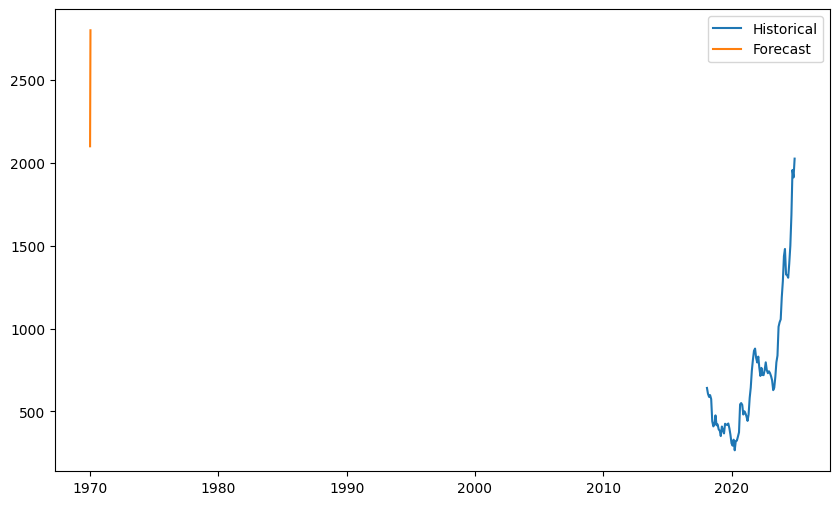

In [12]:

import matplotlib.pyplot as plt

# Plot the historical and forecasted stock prices
plt.figure(figsize=(10,6))
plt.plot(monthly_data, label='Historical')
plt.plot([None for i in monthly_data] + [x for x in forecast], label='Forecast')
plt.legend()
plt.show()